<a href="https://colab.research.google.com/github/bits-mtech/DL/blob/main/DL_Assignment_set1_problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 Set 1

#### Fashion-MNIST is a dataset of images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

## 1.0 Import Libraries/Dataset 

In [86]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import os
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, SGD, Adadelta, Adagrad, Adamax, Nadam, RMSprop
from tensorflow.keras import regularizers


print(tf.__version__)

2.7.0


In [87]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# split training set into training set and validation set using train_test_split provided by scikit-learn 
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.25, random_state=77)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 2.0 Data Visualization and augmentation 

#### Plot at least two samples from each class of the dataset (use matplotlib/seaborn/any other library).

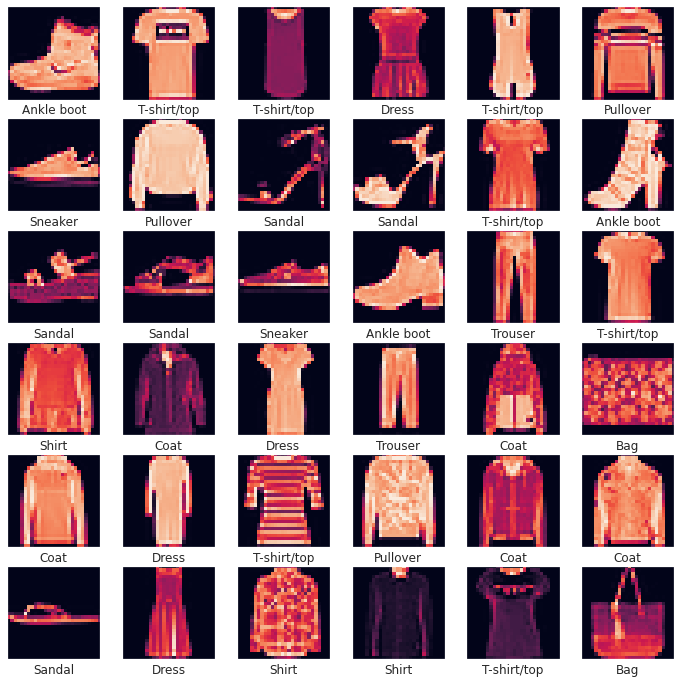

In [88]:
plt.figure(figsize=(12,12))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#### Apply rotation and height shift augmentation (rotation_range, height_shift_range)to the dataset separately. Print the augmented image and the original image for each class and each augmentation.

##### rotation_range

BEFORE: Rotaion Range 



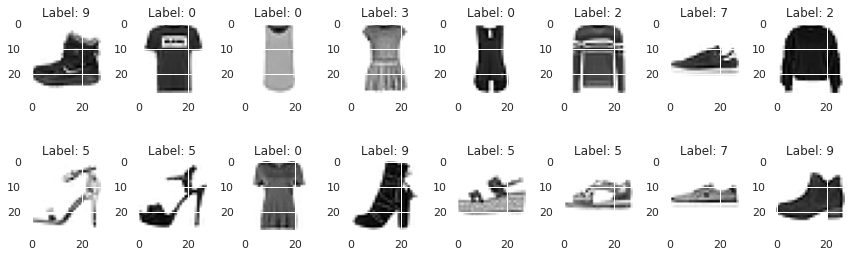

AFTER: Rotaion Range 



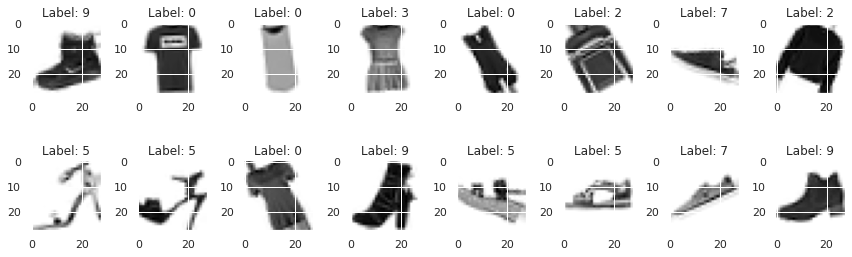

In [89]:
# specify the maximum rotation_range angle
rotation_range_val = 30
# create the class object
datagen = ImageDataGenerator(rotation_range=rotation_range_val)
# fit the generator
datagen.fit(train_images.reshape(train_images.shape[0], 28, 28, 1))

# define number of rows & columns
num_row = 2
num_col = 8
num= num_row*num_col

# plot before
print('BEFORE: Rotaion Range \n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes1[i//num_col, i%num_col]
    ax.imshow(train_images[i], cmap='gray_r')
    ax.set_title('Label: {}'.format(train_labels[i]))
plt.tight_layout()
plt.show()

# plot after
print('AFTER: Rotaion Range \n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(train_images.reshape(train_images.shape[0], 28, 28, 1), 
                         train_labels.reshape(train_labels.shape[0], 1), 
                         batch_size=num, 
                         shuffle=False):
    for i in range(0, num):
        ax = axes2[i//num_col, i%num_col]
        ax.imshow(X[i].reshape(28,28), cmap='gray_r')
        ax.set_title('Label: {}'.format(int(Y[i])))
    break
plt.tight_layout()
plt.show()

##### height_shift_range

BEFORE: Height Shift Range 



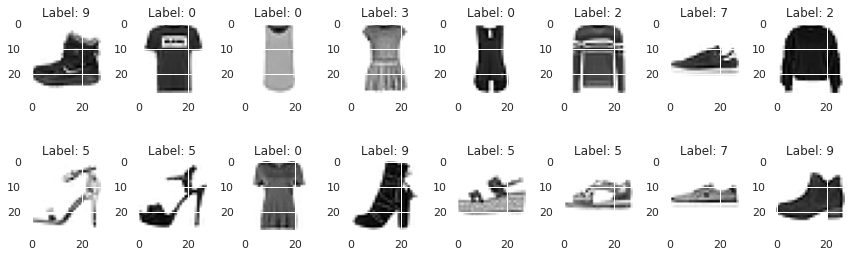

AFTER: Height Shift Range



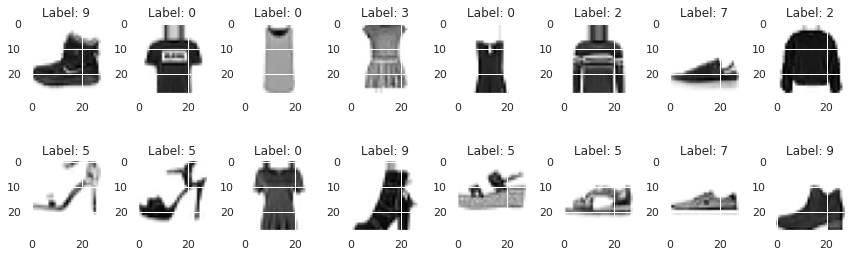

In [90]:
# specify the width and height shift arguments
width_shift_val = 0.25
height_shift_val = 0.25

# import relevant library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create the class object
datagen = ImageDataGenerator(height_shift_range=height_shift_val)

# fit the generator
datagen.fit(train_images.reshape(train_images.shape[0], 28, 28, 1))

# define number of rows & columns
num_row = 2
num_col = 8
num= num_row*num_col

# plot before
print('BEFORE: Height Shift Range \n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes1[i//num_col, i%num_col]
    ax.imshow(train_images[i], cmap='gray_r')
    ax.set_title('Label: {}'.format(train_labels[i]))
plt.tight_layout()
plt.show()

# plot after
print('AFTER: Height Shift Range\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(train_images.reshape(train_images.shape[0], 28, 28, 1), 
                         train_labels.reshape(train_labels.shape[0], 1), 
                         batch_size=num, 
                         shuffle=False):
    for i in range(0, num):
        ax = axes2[i//num_col, i%num_col]
        ax.imshow(X[i].reshape(28,28), cmap='gray_r')
        ax.set_title('Label: {}'.format(int(Y[i])))
    break
plt.tight_layout()
plt.show()

#### Bring the train and test data in the required format.
Print the shapes of train and test data.

In [91]:
x_train = x_train / 255.0
x_val = x_val / 255.0
test_images = test_images / 255.0
print("Training Data Length and size",x_train.shape)
print("Validation Data Length and size",x_val.shape)
print("Testing Data Length and size",test_images.shape)

Training Data Length and size (45000, 28, 28)
Validation Data Length and size (15000, 28, 28)
Testing Data Length and size (10000, 28, 28)


In [92]:
print("Training Data length and size",train_images.shape)
print("Training Data Output",train_labels)
print("Testing Data Length and size",test_images.shape)

Training Data length and size (60000, 28, 28)
Training Data Output [9 0 0 ... 3 0 5]
Testing Data Length and size (10000, 28, 28)


## 3.0 Model Building

- Sequential Model layers- Use AT LEAST 3 hidden layers with appropriate input for each. Choose the best number for hidden units and give reasons.
- Add L2 regularization to all the layers.
- Add one layer of dropout at the appropriate position and give reasons.
- Choose the appropriate activation function for all the layers.
- Print the model summary.

In [93]:
# adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# sgd = SGD(learning_rate=0.001, momentum=0.0, decay=0.0, nesterov=False)
# adad = Adadelta(learning_rate=1.0,rho=0.95,epsilon=None,decay=0.0)
# adag = Adagrad(learning_rate=0.01,epsilon=None,decay=0.0)
# adamax = Adamax(learning_rate=0.002,beta_1=0.9,beta_2=0.999,epsilon=None,decay=0.0)
# nadam = Nadam(learning_rate=0.002,beta_1=0.9,beta_2=0.999,epsilon=None,schedule_decay=0.004)
# rms = RMSprop(learning_rate=0.001,rho=0.9,epsilon=None,decay=0.0)

# loss = ['sparse_categorical_crossentropy','mean_squared_error','mean_absolute_error',
#         'categorical_crossentropy','categorical_hinge']

# metrics = ['accuracy','precision','recall']

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There's lots of options, but just use these for now.

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like` [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05]`, it saves you from fishing through it looking for the biggest value, and turns it into `[0,0,0,0,1,0,0,0,0]`


### Managing Model Overfitting! 

Overfitting could be handled in many ways. Some most common ways we will see here include:

- Weight Regularization
- Dropout

#### Weight Regularization 
One of the most common way is to put constraints on the complexity of a network by forcing its weights only to take small values, which makes the distribution of weight values more **regular**. 

This is called "weight regularization", and it is done by adding to the loss function of the network a cost associated with having large weights.

#### Dropout 
Dropout is another most commonly used regularization techniques for neural networks.

Dropout, applied as a hidden layer, randomly drops out a number of output features of the layer during training.

The "dropout rate" is the fraction of the features that are being dropped; it is usually set between 0.2 and 0.5.

At test time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to balance for the fact that more units are active than at training time.

In [94]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))  # This function flattens the input data

model.add(Dense(390, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))   # Add a dropout layer with 0.2 probability
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(10, activation='softmax'))   # The number of units in the last layer should always be the number of classes in which we have to classify our input data.
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 390)               306150    
                                                                 
 dense_11 (Dense)            (None, 256)               100096    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 10)               

# 4.0 Model Compilation 

**Loss function** — calculates the difference between the output and the target variable. It measures the accuracy of the model during training and we want to minimize this function. 
In this example, we chose the *sparse_categorical_crossentropy* loss function. Cross-entropy is the default loss function to use for a multi-class classification problem and it's sparse because our targets are not one-hot encodings but are integers.


**Optimizer** — how the model is updated and is based on the data and the loss function. Adam is an extension to the classic stochastic gradient descent and is popular because it's shown to be effective and efficient.


**Metrics** — monitors the training and testing steps. Accuracy is a common metric and it measures the fraction of images that are correctly classified.

In [95]:
model.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), 
              loss='sparse_categorical_crossentropy', metrics='accuracy')

# 5.0 Model Training

Next, we train the model by fitting it to the training data, so we give it the input (images) and expected output (labels). Here, an important step to minimize overfitting is validation.

In [96]:
%%time
batch_size = 1500
epochs = 50

history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(x_val, y_val))  # You can set verbose to 1 to get the status of your model training, 2 to get one line per epoch, here I kept it 0 to keep the notebook precise. 
 
_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.4726 - accuracy: 0.8830
Train: 0.933, Test: 0.883
CPU times: user 27.9 s, sys: 1.97 s, total: 29.9 s
Wall time: 25.3 s


# 6.0 Model Evaluation

In [97]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
  
# plot image in a grid
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
# plot the value array    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot= plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

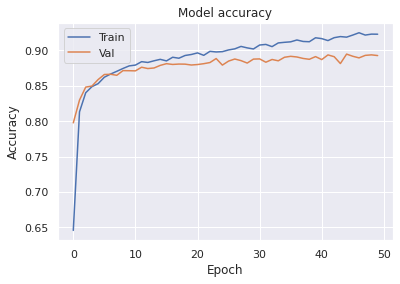

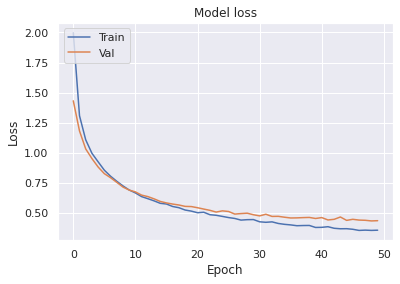

In [98]:
plot_history(history)

## Making Prediction with **Model**

In [99]:
# confidence of the model that the image corresponds to the label 
i=12
predictions = model.predict(test_images)
print("Prediction Shape is: ", predictions.shape) #(10000, 10)
print("Clas Label of first predicted element: ", class_names[np.argmax(predictions[i])])
print("Predicted: ",np.argmax(predictions[i]),"\nActual: ",test_labels[i])

Prediction Shape is:  (10000, 10)
Clas Label of first predicted element:  Sandal
Predicted:  5 
Actual:  7


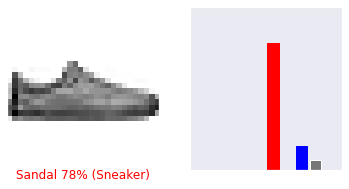

In [100]:
# look at 1st image, predictions, prediction array
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

(10000,) (10000,) (1170,)


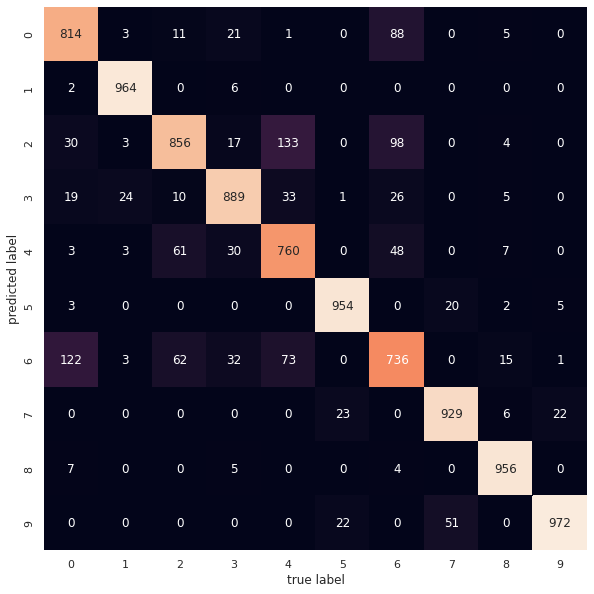

In [101]:
#Calculate the records which are not predicted correctly
predicted_label = np.argmax(predictions,axis=1)
false_record = np.where(test_labels != predicted_label)
print(predicted_label.shape, test_labels.shape, false_record[0].shape)

mat = confusion_matrix(test_labels, predicted_label)
plt.figure(figsize=(10, 10))
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=np.unique(test_labels),
            yticklabels=np.unique(test_labels))
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [102]:
print(class_names)
print(classification_report(predicted_label,test_labels))

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       943
           1       0.96      0.99      0.98       972
           2       0.86      0.75      0.80      1141
           3       0.89      0.88      0.89      1007
           4       0.76      0.83      0.79       912
           5       0.95      0.97      0.96       984
           6       0.74      0.70      0.72      1044
           7       0.93      0.95      0.94       980
           8       0.96      0.98      0.97       972
           9       0.97      0.93      0.95      1045

    accuracy                           0.88     10000
   macro avg       0.88      0.89      0.88     10000
weighted avg       0.88      0.88      0.88     10000



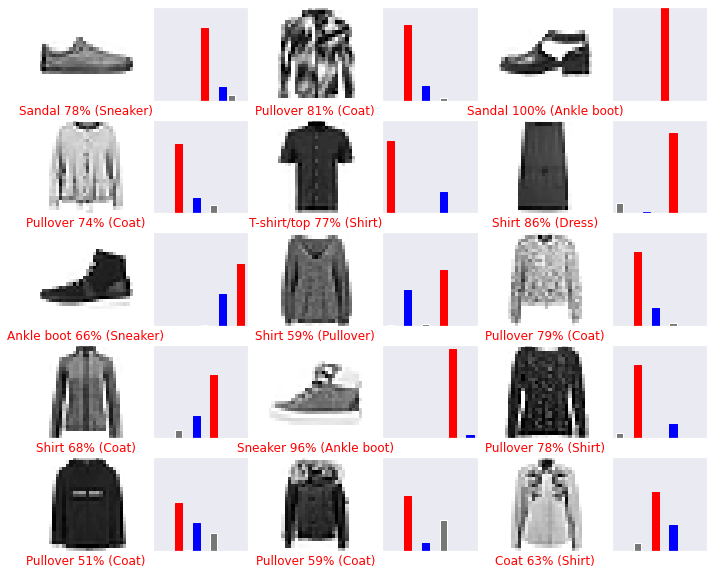

In [103]:
# Plot the first 15 false predicted images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
plt.title("Predictions of the first 15 flase images, with Model")
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(false_record[0][i], predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(false_record[0][i], predictions, test_labels)

# Hyperparameter Tuning


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_40 (Dense)            (None, 512)               401920    
                                                                 
 dense_41 (Dense)            (None, 256)               131328    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_42 (Dense)            (None, 128)               32896     
                                                                 
 dense_43 (Dense)            (None, 100)               12900     
                                                                 
 dense_44 (Dense)            (None, 100)              

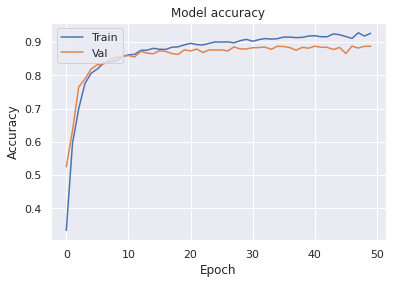

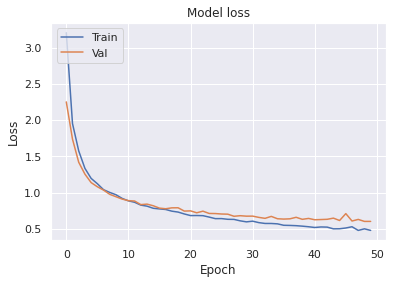

In [109]:
model_2 = Sequential()
model_2.add(Flatten(input_shape=(28,28)))  # This function flattens the input data

model_2.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_2.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_2.add(Dropout(0.2))   # Add a dropout layer with 0.2 probability
model_2.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_2.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_2.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_2.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_2.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_2.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_2.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_2.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_2.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_2.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_2.add(Dense(10, activation='softmax'))   # The number of units in the last layer should always be the number of classes in which we have to classify our input data.
model_2.summary()
model_2.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), 
              loss='sparse_categorical_crossentropy', metrics='accuracy')
history_2 = model_2.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(x_val, y_val))  # You can set verbose to 1 to get the status of your model training, 2 to get one line per epoch, here I kept it 0 to keep the notebook precise. 
 
_, train_acc_2 = model_2.evaluate(x_train, y_train, verbose=1)
_, test_acc_2 = model_2.evaluate(test_images, test_labels, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc_2, test_acc_2))
plot_history(history_2)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_34 (Dense)            (None, 512)               401920    
                                                                 
 dense_35 (Dense)            (None, 256)               131328    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_36 (Dense)            (None, 128)               32896     
                                                                 
 dense_37 (Dense)            (None, 64)                8256      
                                                                 
 dense_38 (Dense)            (None, 32)               

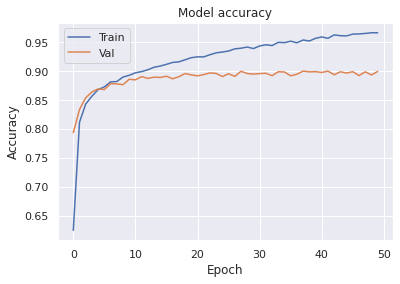

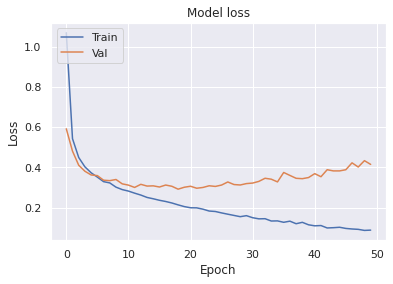

In [107]:
model_3 = Sequential()
model_3.add(Flatten(input_shape=(28,28)))  # This function flattens the input data

model_3.add(Dense(512, activation='relu'))
model_3.add(Dense(256, activation='relu'))
model_3.add(Dropout(0.2))   # Add a dropout layer with 0.2 probability
model_3.add(Dense(128, activation='relu'))
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(10, activation='softmax'))   # The number of units in the last layer should always be the number of classes in which we have to classify our input data.
model_3.summary()
model_3.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), 
              loss='sparse_categorical_crossentropy', metrics='accuracy')
history_3 = model_3.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(x_val, y_val))  # You can set verbose to 1 to get the status of your model training, 2 to get one line per epoch, here I kept it 0 to keep the notebook precise. 
 
_, train_acc_3 = model_3.evaluate(x_train, y_train, verbose=1)
_, test_acc_3 = model_3.evaluate(test_images, test_labels, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc_3, test_acc_3))
plot_history(history_3)